# 1. Merge 6 Datasets

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,KBinsDiscretizer,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
df1 = pd.read_csv('./datasets/dataset1.csv')

In [155]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
56369,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
56370,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
56371,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [156]:
df2 = pd.read_csv('./datasets/dataset2.csv')

In [157]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [158]:
df3 = pd.read_csv('./datasets/dataset3.csv',sep = ';')

In [159]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [160]:
dfcombine2 = pd.concat([df1,df2],axis=0, ignore_index=True)

In [161]:
dfcombine3 = pd.concat([dfcombine2,df3],axis=0, ignore_index=True)

In [162]:
dfcombine3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,NaN
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,NaN
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,NaN
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,NaN
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146790,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,NaN,yes
146791,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,NaN,yes
146792,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,NaN,yes
146793,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,NaN,no


In [163]:
df5 = pd.read_csv('./datasets/dataset5.csv')

In [164]:
df5

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [165]:
df5 = df5.rename(columns={'Exited': 'y'})
df5 = df5.rename(columns={'Balance': 'balance'})
df5 = df5.rename(columns={'Age': 'age'})

In [166]:
df5

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,age,Tenure,balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [167]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  y                10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [168]:
df5 = df5.drop(columns=['RowNumber', 'CustomerId','Surname','CreditScore','Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])

In [169]:
dfcombine6 = pd.concat([dfcombine3,df5],axis=0, ignore_index=True)

In [170]:
dfcombine6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156795 entries, 0 to 156794
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        156795 non-null  int64  
 1   job        146795 non-null  object 
 2   marital    146795 non-null  object 
 3   education  146795 non-null  object 
 4   default    146795 non-null  object 
 5   balance    156795 non-null  float64
 6   housing    146795 non-null  object 
 7   loan       146795 non-null  object 
 8   contact    146795 non-null  object 
 9   day        146795 non-null  float64
 10  month      146795 non-null  object 
 11  duration   146795 non-null  float64
 12  campaign   146795 non-null  float64
 13  pdays      146795 non-null  float64
 14  previous   146795 non-null  float64
 15  poutcome   146795 non-null  object 
 16  deposit    56373 non-null   object 
 17  y          100422 non-null  object 
dtypes: float64(6), int64(1), object(11)
memory usage: 21.5+ MB


In [171]:
dfcombine6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes,NaN
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes,NaN
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes,NaN
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,-1.0,0.0,unknown,yes,NaN
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,-1.0,0.0,unknown,yes,NaN


In [172]:
dfcombine6.isna().sum()

age               0
job           10000
marital       10000
education     10000
default       10000
balance           0
housing       10000
loan          10000
contact       10000
day           10000
month         10000
duration      10000
campaign      10000
pdays         10000
previous      10000
poutcome      10000
deposit      100422
y             56373
dtype: int64

In [173]:
df7 = pd.read_csv('./datasets/dataset7.csv')

In [174]:
df7

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [175]:
df7 = df7.drop(columns=['Id'])

In [176]:
dffinal = pd.concat([dfcombine6,df7],axis=0, ignore_index=True)

In [177]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202006 entries, 0 to 202005
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        201997 non-null  float64
 1   job        192006 non-null  object 
 2   marital    192006 non-null  object 
 3   education  192006 non-null  object 
 4   default    192006 non-null  object 
 5   balance    202003 non-null  float64
 6   housing    192006 non-null  object 
 7   loan       192006 non-null  object 
 8   contact    192006 non-null  object 
 9   day        192006 non-null  float64
 10  month      192006 non-null  object 
 11  duration   192006 non-null  float64
 12  campaign   192006 non-null  float64
 13  pdays      192006 non-null  float64
 14  previous   192006 non-null  float64
 15  poutcome   192006 non-null  object 
 16  deposit    56373 non-null   object 
 17  y          145633 non-null  object 
dtypes: float64(7), object(11)
memory usage: 27.7+ MB


In [178]:
dffinal

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,y
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes,NaN
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes,NaN
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes,NaN
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,-1.0,0.0,unknown,yes,NaN
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,-1.0,0.0,unknown,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202001,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,NaN,yes
202002,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,NaN,yes
202003,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,NaN,yes
202004,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,NaN,no


In [179]:
dffinal.isna().sum()

age               9
job           10000
marital       10000
education     10000
default       10000
balance           3
housing       10000
loan          10000
contact       10000
day           10000
month         10000
duration      10000
campaign      10000
pdays         10000
previous      10000
poutcome      10000
deposit      145633
y             56373
dtype: int64

In [180]:
dffinal.drop_duplicates(inplace=True)

In [181]:
dffinal

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,y
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes,NaN
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes,NaN
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes,NaN
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,-1.0,0.0,unknown,yes,NaN
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,-1.0,0.0,unknown,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156854,NaN,services,married,primary,no,179.0,yes,no,unknown,5.0,may,1778.0,1.0,-1.0,0.0,unknown,NaN,no
156855,NaN,admin.,married,tertiary,no,0.0,yes,no,unknown,5.0,may,138.0,1.0,-1.0,0.0,unknown,NaN,no
201998,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17.0,nov,266.0,1.0,-1.0,0.0,unknown,NaN,yes
201999,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17.0,nov,300.0,1.0,40.0,8.0,failure,NaN,yes


In [182]:
dffinal.isna().sum()

age              9
job           6498
marital       6498
education     6498
default       6498
balance          3
housing       6498
loan          6498
contact       6498
day           6498
month         6498
duration      6498
campaign      6498
pdays         6498
previous      6498
poutcome      6498
deposit      51724
y            45211
dtype: int64

### Check values of y

In [183]:
dffinal['y'].value_counts()

no     39934
yes     5292
0       4913
1       1585
Name: y, dtype: int64

In [184]:
dffinal['y'] = dffinal['y'].replace({0: 'no', 1: 'yes'}) #replace value for yes/no

In [185]:
dffinal['y'].value_counts() 

no     44847
yes     6877
Name: y, dtype: int64

# 2.

### Check final table

In [186]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96935 entries, 0 to 202000
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        96926 non-null  float64
 1   job        90437 non-null  object 
 2   marital    90437 non-null  object 
 3   education  90437 non-null  object 
 4   default    90437 non-null  object 
 5   balance    96932 non-null  float64
 6   housing    90437 non-null  object 
 7   loan       90437 non-null  object 
 8   contact    90437 non-null  object 
 9   day        90437 non-null  float64
 10  month      90437 non-null  object 
 11  duration   90437 non-null  float64
 12  campaign   90437 non-null  float64
 13  pdays      90437 non-null  float64
 14  previous   90437 non-null  float64
 15  poutcome   90437 non-null  object 
 16  deposit    45211 non-null  object 
 17  y          51724 non-null  object 
dtypes: float64(7), object(11)
memory usage: 14.1+ MB


In [187]:
dffinal.describe()

,age,balance,day,duration,campaign,pdays,previous
count,96926.000000,96932.000000,90437.000000,90437.000000,90437.000000,90437.000000,90437.000000
mean,40.839795,9161.524212,15.805024,258.175791,2.763559,40.191448,0.580316
std,11.071644,30522.238303,8.322674,257.565800,3.097826,100.121200,2.303381
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,91.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,525.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1896.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,999.000000,250898.090000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [188]:
dffinal.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,y
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes,NaN
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes,NaN
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes,NaN
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,-1.0,0.0,unknown,yes,NaN
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,-1.0,0.0,unknown,yes,NaN


In [189]:
dffinal.isna().sum()

age              9
job           6498
marital       6498
education     6498
default       6498
balance          3
housing       6498
loan          6498
contact       6498
day           6498
month         6498
duration      6498
campaign      6498
pdays         6498
previous      6498
poutcome      6498
deposit      51724
y            45211
dtype: int64

In [190]:
dffinal.age.min(), dffinal.age.max() #-1 and 999 is not a real world age

(-1.0, 999.0)

In [191]:
dffinal['age'] = dffinal['age'].replace([-1, 999], np.nan) #replace age with Nan
dffinal['age'].fillna(dffinal['age'].median(), inplace=True)

In [192]:
dffinal = dffinal.drop(columns='poutcome')
dffinal = dffinal.drop(columns='pdays')

In [193]:
num_features = dffinal.select_dtypes(include = ['int64','float64'])
cat_features = dffinal.select_dtypes(include = ['object'])

In [194]:
num_features

,age,balance,day,duration,campaign,previous
0,59.0,2343.0,5.0,1042.0,1.0,0.0
1,56.0,45.0,5.0,1467.0,1.0,0.0
2,41.0,1270.0,5.0,1389.0,1.0,0.0
3,55.0,2476.0,5.0,579.0,1.0,0.0
4,54.0,184.0,5.0,673.0,2.0,0.0
...,...,...,...,...,...,...
156854,39.0,179.0,5.0,1778.0,1.0,0.0
156855,39.0,0.0,5.0,138.0,1.0,0.0
201998,39.0,113.0,17.0,266.0,1.0,0.0
201999,39.0,2850.0,17.0,300.0,1.0,8.0


In [195]:
cat_features

,job,marital,education,default,housing,loan,contact,month,deposit,y
0,admin.,married,secondary,no,yes,no,unknown,may,yes,NaN
1,admin.,married,secondary,no,no,no,unknown,may,yes,NaN
2,technician,married,secondary,no,yes,no,unknown,may,yes,NaN
3,services,married,secondary,no,yes,no,unknown,may,yes,NaN
4,admin.,married,tertiary,no,no,no,unknown,may,yes,NaN
...,...,...,...,...,...,...,...,...,...,...
156854,services,married,primary,no,yes,no,unknown,may,NaN,no
156855,admin.,married,tertiary,no,yes,no,unknown,may,NaN,no
201998,student,single,tertiary,no,no,no,cellular,nov,NaN,yes
201999,retired,married,secondary,no,no,no,cellular,nov,NaN,yes


### Balance Target output

In [196]:
dffinal.y.unique()

array([nan, 'no', 'yes'], dtype=object)

In [197]:
dffinal.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
previous     float64
deposit       object
y             object
dtype: object

## Filling Mode/Meadian/Mean for Numerical Features

In [198]:
# for Numerical Features
# age -> mean/median
# balance -> mean/median
# day -> mode
# duration -> mode
# campaign -> mode
# previous -> mean/med

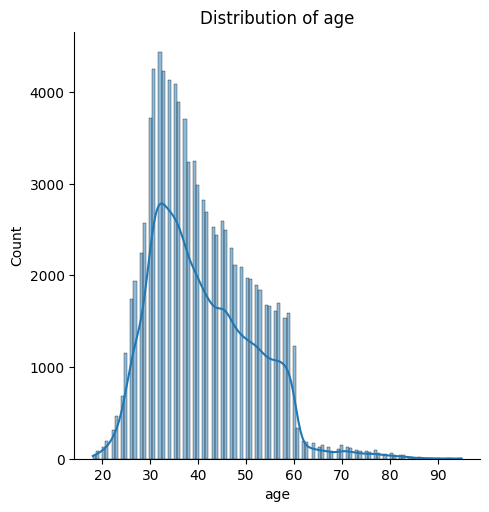

age - median: 39.0; mean: 40.83095888997782


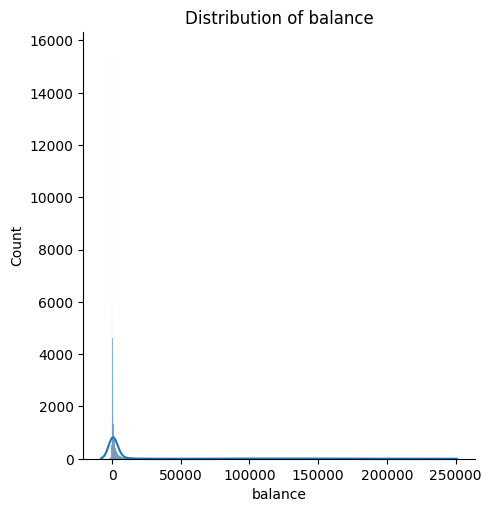

balance - median: 525.0; mean: 9161.524211612266


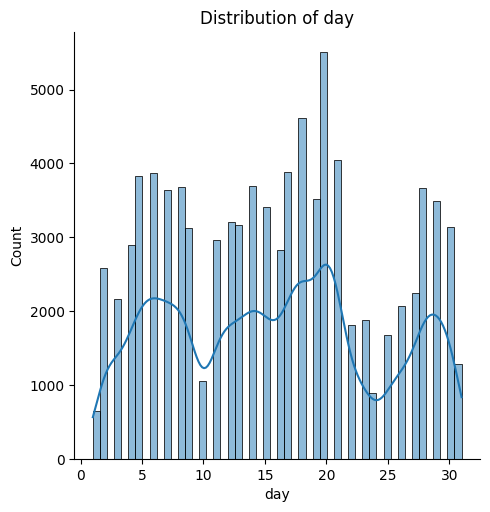

day - median: 16.0; mean: 15.805024492187933


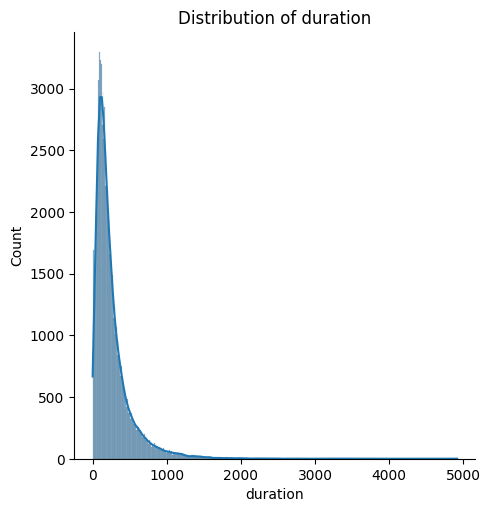

duration - median: 180.0; mean: 258.1757908820505


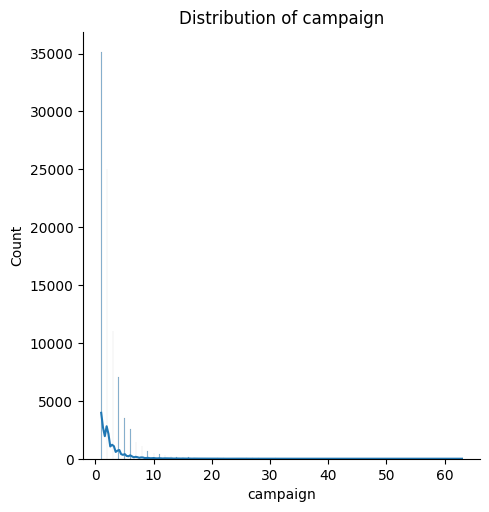

campaign - median: 2.0; mean: 2.7635591627320677


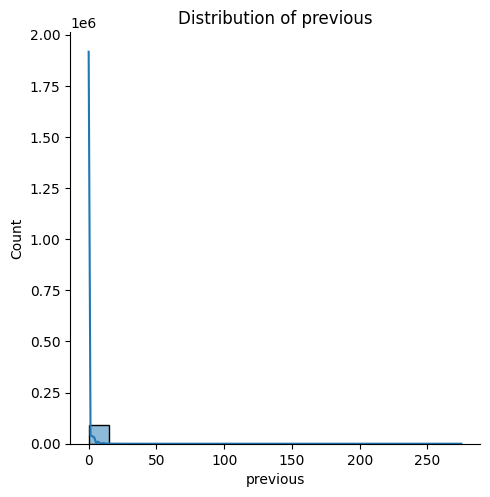

previous - median: 0.0; mean: 0.580315578800712
age         0
balance     0
day         0
duration    0
campaign    0
previous    0
dtype: int64


In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']

# Plot distributions and print median and mean for each column
for col in num_cols:
    sns.displot(dffinal[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"{col} - median: {dffinal[col].median()}; mean: {dffinal[col].mean()}")

# Fill NaN values in the numerical columns with the median
dffinal[num_cols] = dffinal[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)

# Check for remaining NaN values
print(dffinal[num_cols].isna().sum())


In [200]:
# for Categorical Features
# ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'] -> ratio or majority

## Finding Ratio to fill Null/NaN value for Categorical Features

In [201]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'deposit','y']

def fill_nan_with_ratio(df, col):
    ratio = df[col].value_counts(normalize=True)
    missing_count = df[col].isna().sum()
    
    if missing_count > 0:
        fill_values = []
        for value, prop in ratio.items():
            count = int(np.round(prop * missing_count))
            fill_values.extend([value] * count)
        
        # Ensure the fill values match the number of NaNs
        if len(fill_values) < missing_count:
            fill_values.extend(np.random.choice(ratio.index, size=missing_count - len(fill_values), p=ratio.values))
        elif len(fill_values) > missing_count:
            fill_values = fill_values[:missing_count]

        np.random.shuffle(fill_values)
        df.loc[df[col].isna(), col] = fill_values

for col in cat_cols:
    fill_nan_with_ratio(dffinal, col)


In [202]:
print(dffinal[cat_cols].isnull().sum())

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
deposit      0
y            0
dtype: int64


In [203]:
# #1. set the cond = Y, and cond = N
# condY = dffinal.y == 'yes'  #to 0 or 1
# condN = dffinal.y == 'no'

# dffinal_y = dffinal[condY] # n = 5292
# dffinal_n = dffinal[condN].sample(n=5292, random_state=999)

# #3. concat these two dfs
# dffinal = pd.concat([dffinal_y, dffinal_n])

# dffinal.y.value_counts()

In [204]:
dffinal.y.value_counts()

no     84047
yes    12888
Name: y, dtype: int64

### EDA

In [205]:
num_features.columns ,cat_features.columns

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'deposit', 'y'],
       dtype='object'))

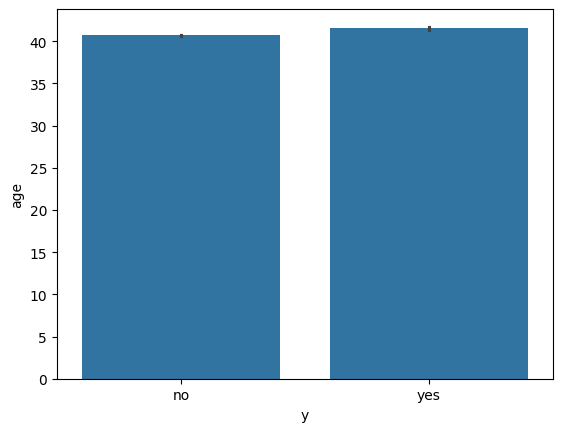

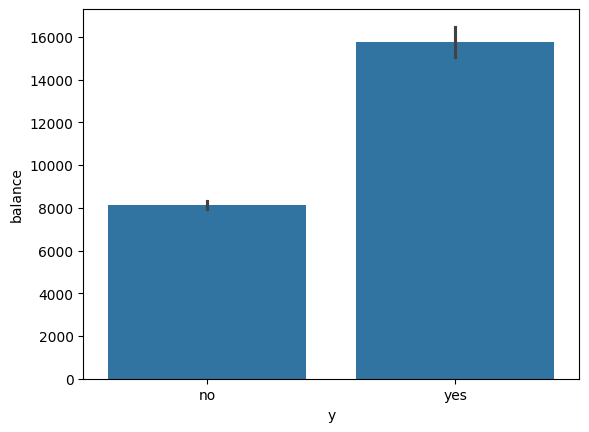

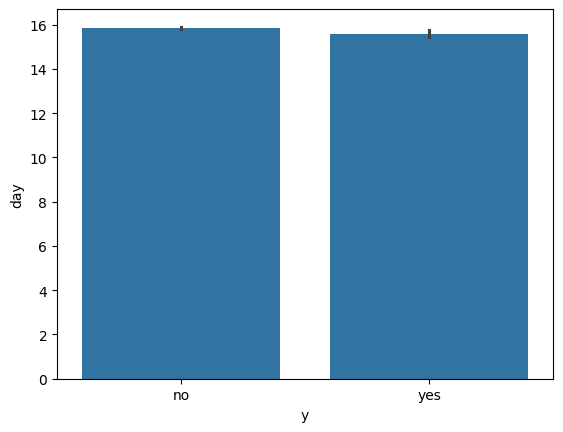

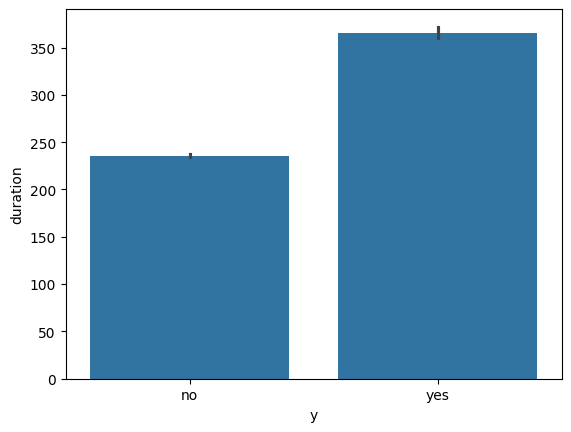

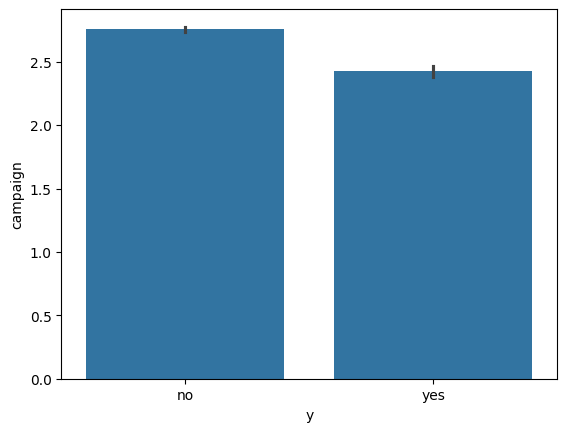

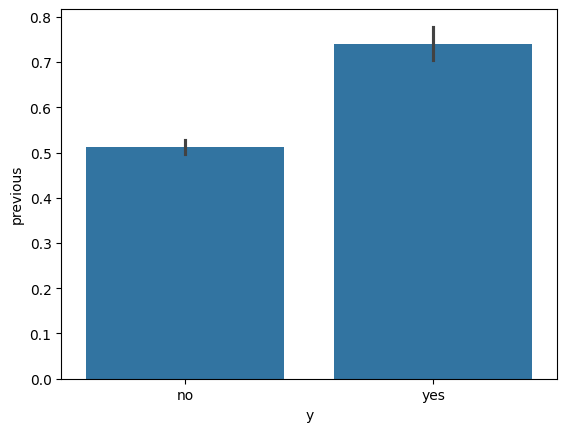

In [206]:
for col in num_features.columns:
    sns.barplot(x = dffinal['y'], y = dffinal[col])
    plt.show()

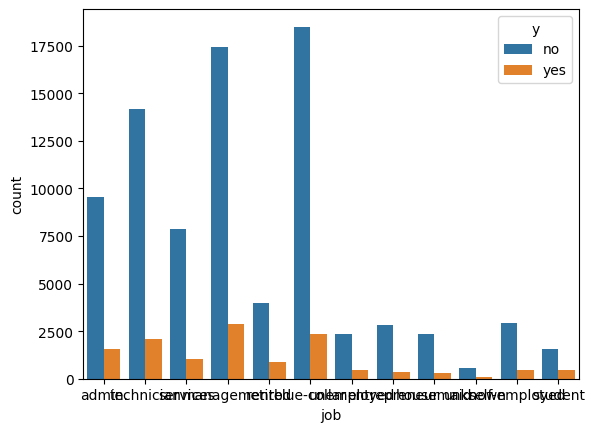

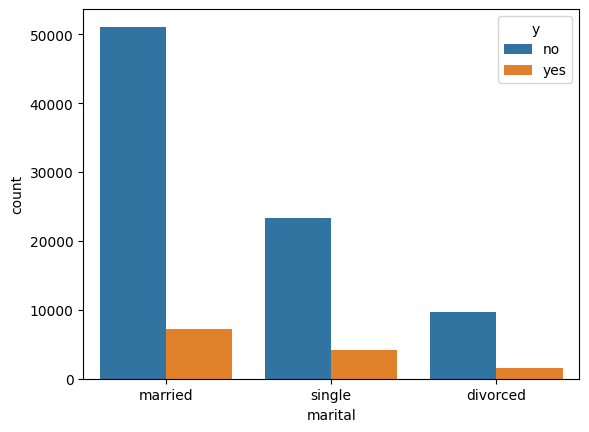

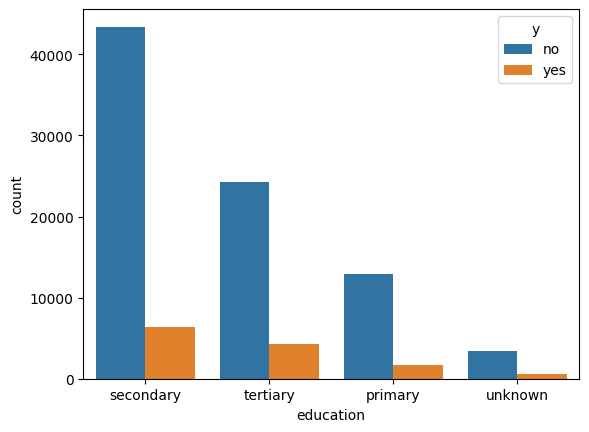

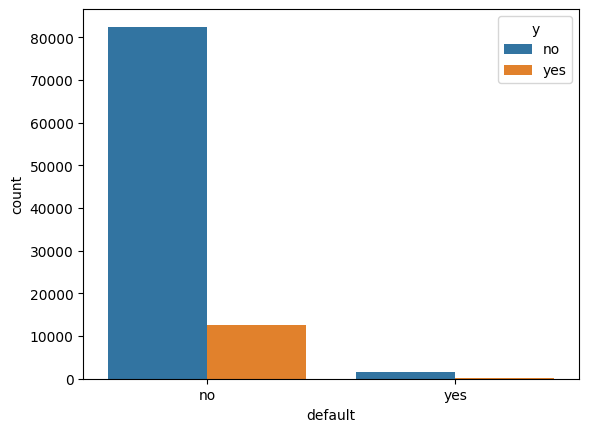

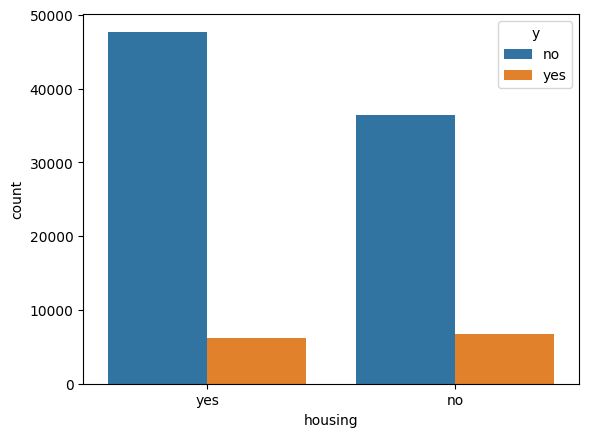

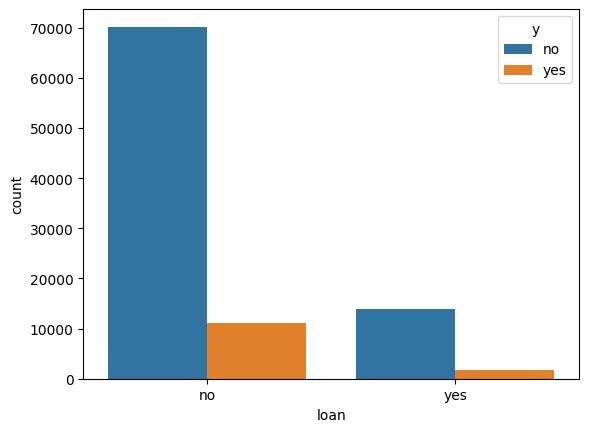

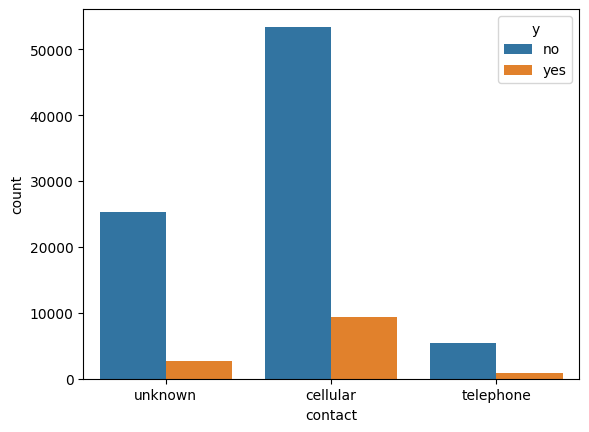

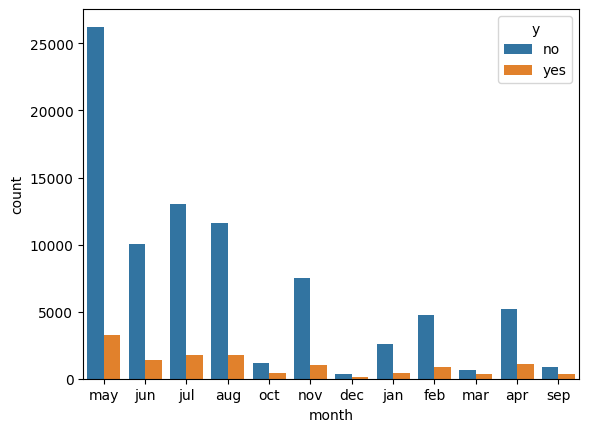

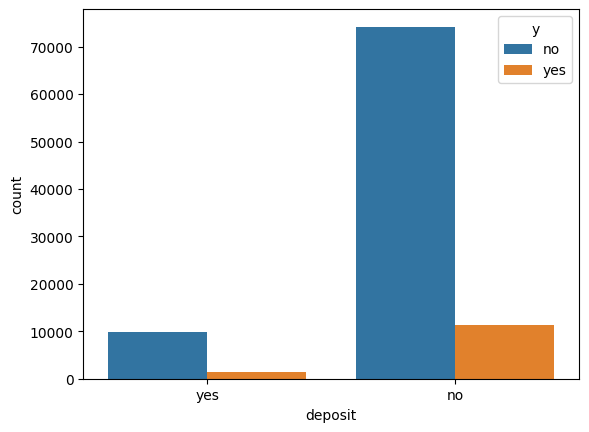

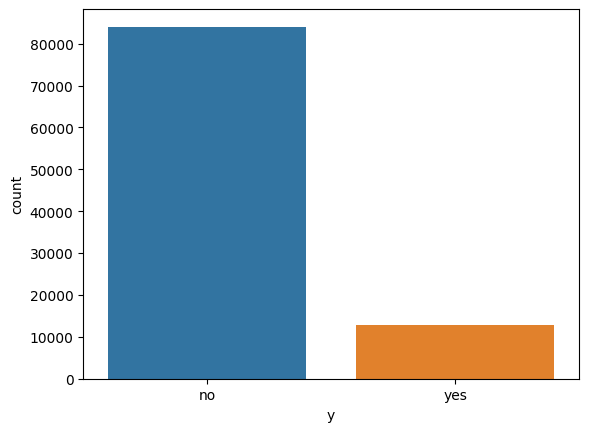

In [207]:
for col in cat_features.columns:
    sns.countplot(x = dffinal[col], hue = dffinal['y'])
    plt.show()

In [208]:
dffinal['y'].value_counts()

no     84047
yes    12888
Name: y, dtype: int64

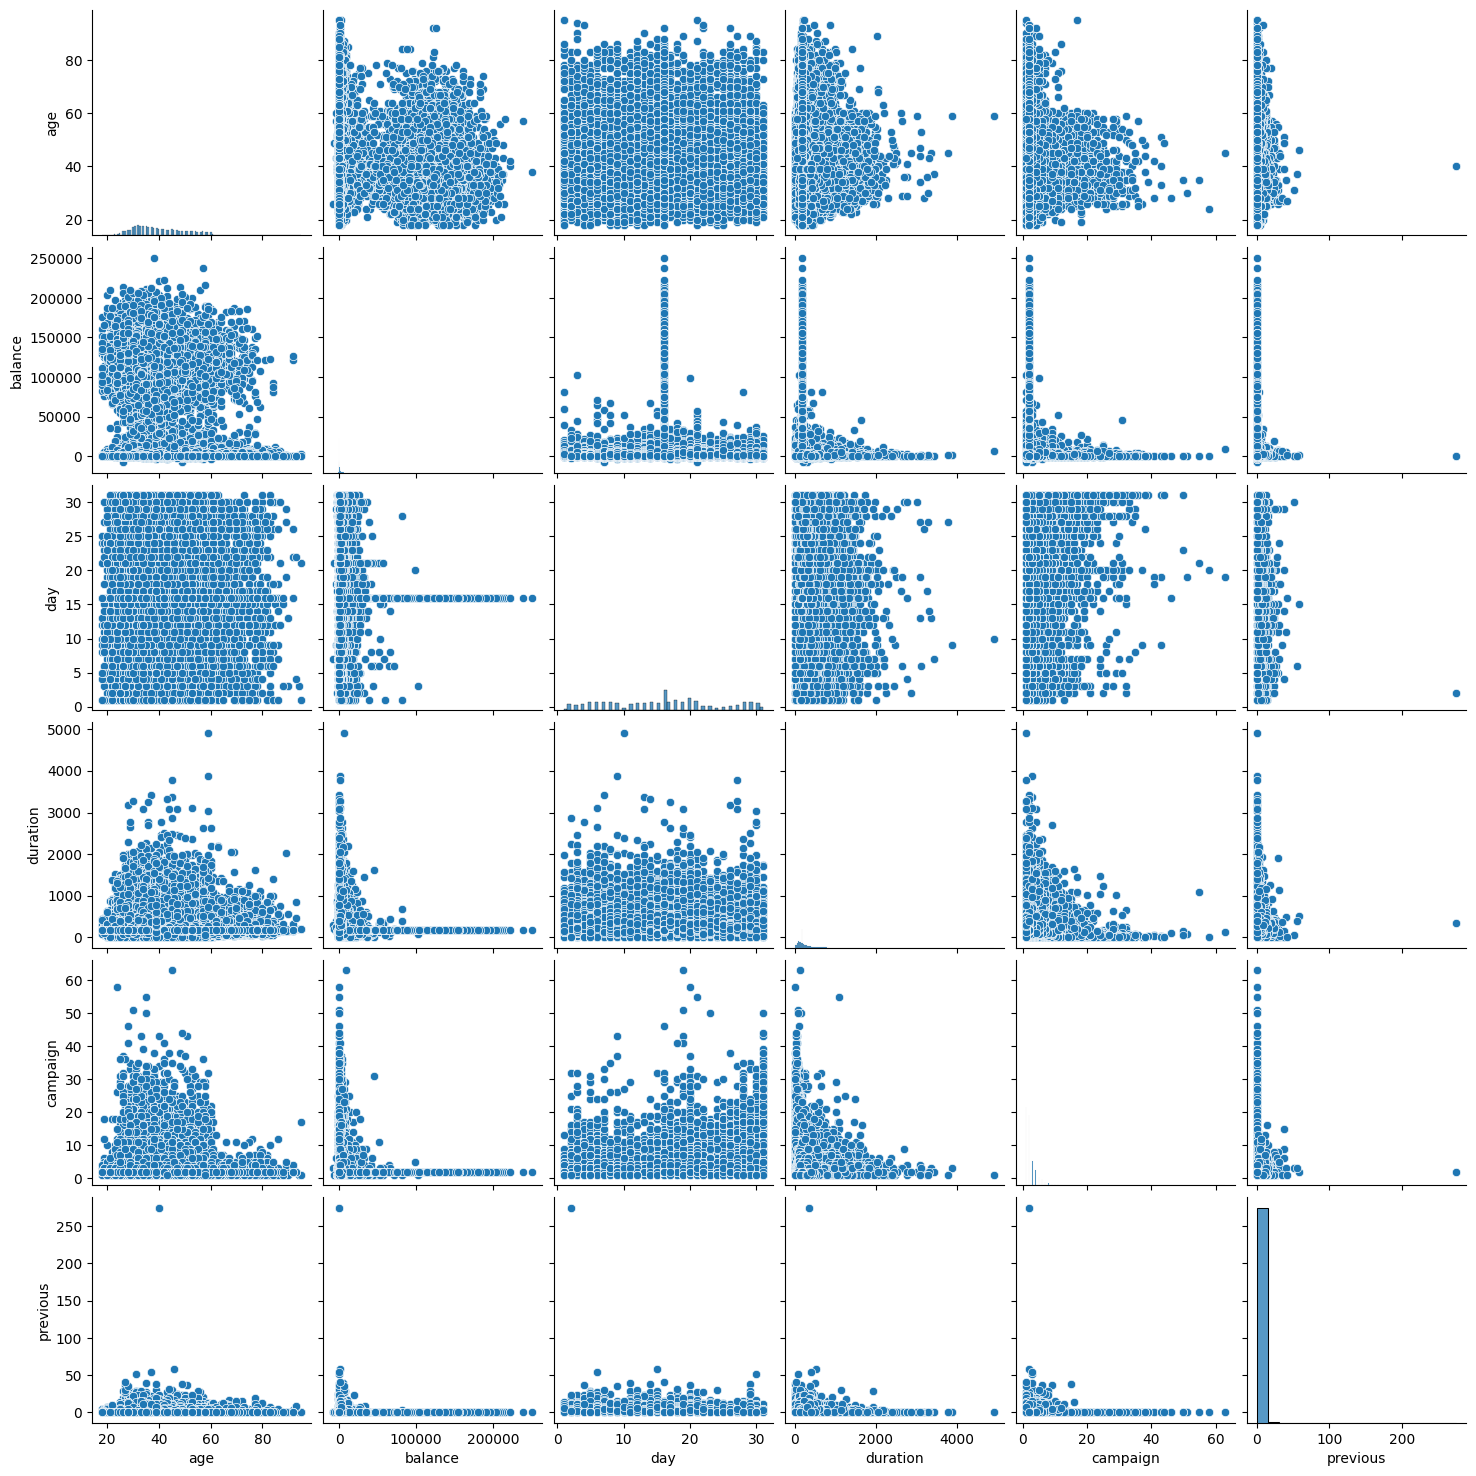

In [209]:
sns.pairplot(data=dffinal)

<Axes: xlabel='x', ylabel='y'>

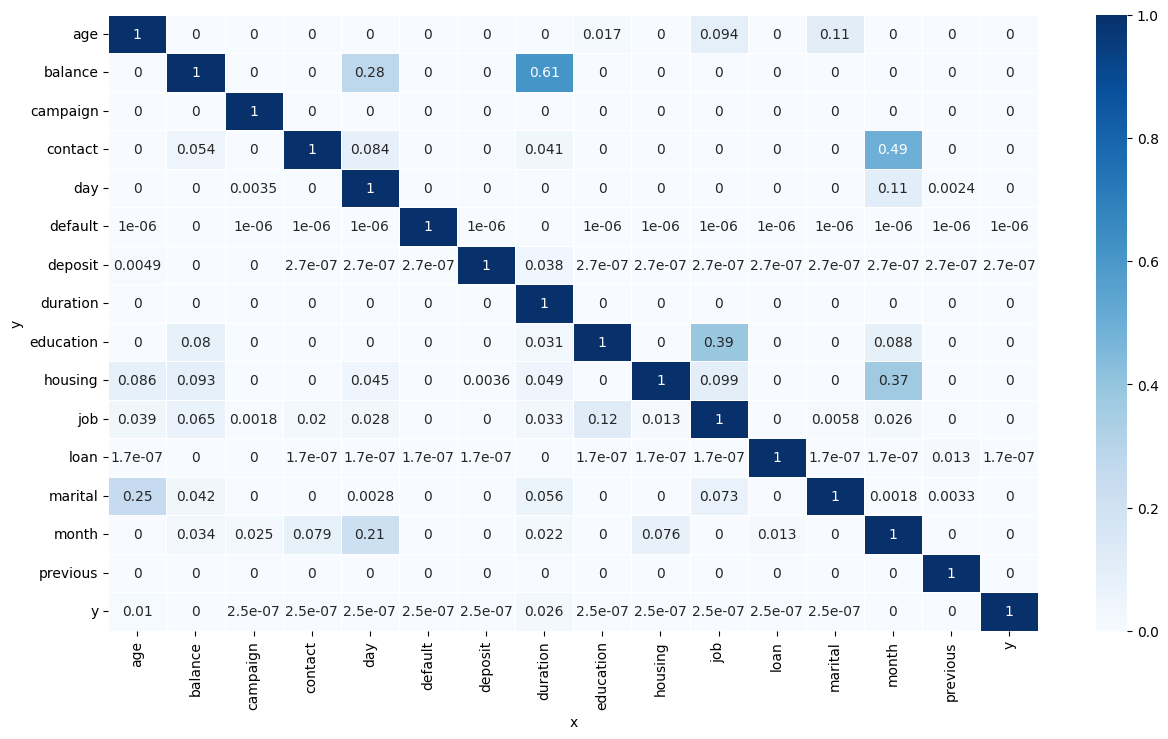

In [210]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = dffinal.copy()

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [211]:
dffinal.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
deposit      0
y            0
dtype: int64

In [212]:
X = dffinal.drop(columns=['contact','day','month','duration','campaign','previous','y'])
y = dffinal['y']

In [213]:
X.isna().sum() , y.isna().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 deposit      0
 dtype: int64,
 0)

In [214]:
X.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
deposit       object
dtype: object

### Label Encoding For Categorical Features

In [215]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
# X['contact'] = le.fit_transform(X['contact'])
# X['month'] = le.fit_transform(X['month'])
X['deposit'] = le.fit_transform(X['deposit'])

In [216]:
X['age'] = X['age'].astype(int)

In [217]:
X.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
deposit        int64
dtype: object

### Doing SMOTE

In [218]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

In [219]:
y_smt.value_counts()

no     84047
yes    84047
Name: y, dtype: int64

### split data

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_smt,y_smt,train_size=0.8)

In [221]:
X_train.shape, y_train.shape

((134475, 9), (134475,))

In [222]:
X.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
deposit        int64
dtype: object

### scaling

In [223]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler()

scaler.fit(X_train[['balance']])

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler has been saved!")

X_train['balance'] = scaler.transform(X_train[['balance']])
X_test['balance'] = scaler.transform(X_test[['balance']])


Scaler has been saved!


In [224]:
print("Scaler Min:", scaler.data_min_)
print("Scaler Max:", scaler.data_max_)

Scaler Min: [-8019.]
Scaler Max: [250898.09]


In [ ]:
numerical_columns = ['balance']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
gb = GradientBoostingClassifier(random_state=999)

# Add XGBoost to the list of models
models = [lr, rf, gb]

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=999)


for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"Model: {model}")
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())
    print("\n")


/Users/gg/Desktop/Coding/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gg/Desktop/Coding/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Model: LogisticRegression(random_state=999)
Scores:  [0.6797546  0.68153932 0.6775237  0.67421454 0.67811861] - Scores mean:  0.6782301543037739 - Scores std (lower better):  0.0024458619205649937


Model: RandomForestClassifier(random_state=999)
Scores:  [0.82751441 0.82249489 0.82401933 0.82349879 0.82416806] - Scores mean:  0.8243390964863357 - Scores std (lower better):  0.0016924138008527388


Model: GradientBoostingClassifier(random_state=999)
Scores:  [0.70864473 0.71544897 0.70853318 0.70596765 0.71046663] - Scores mean:  0.7098122327570181 - Scores std (lower better):  0.0031616720579489095




### Grid search with Randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'bootstrap': [True, False]
}
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold, refit=True, return_train_score=True)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=RandomForestClassifier(random_state=999),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.cv_results_)

{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.8255586540249116
{'mean_fit_time': array([ 3.89996185,  7.48392825, 14.72254357,  3.61875348,  7.24324284,
       14.17482381,  3.48197117,  6.88784738, 13.63812222,  3.49149876,
        6.94391928, 13.88678069,  3.47951775,  6.99332633, 13.7915875 ,
        3.36574054,  6.72010274, 13.26008019,  3.23469653,  6.48650823,
       13.15204945,  3.25855832,  6.43694305, 12.77694759,  3.21733103,
        6.40370674, 12.65935168,  1.98377404,  4.02581229,  7.63076401,
        1.93894119,  3.85338883,  7.5361804 ,  1.93885083,  3.86041622,
        7.5512392 ,  1.94956484,  3.8455565 ,  7.52686024,  1.95682545,
        3.85051417,  7.55106597,  1.94956837,  3.85186458,  7.54131684,
        1.97028117,  3.94355769,  7.67712636,  1.98120122,  3.94076262,
        7.6783464 ,  1.99180136,  3.89810104,  7.77588787,  3.45481229,
        6.76485653, 13.11871781,  3.26148214,  6.39549117, 12.6044

In [ ]:
from sklearn.metrics import classification_report

y_pred = grid.predict(X_test)

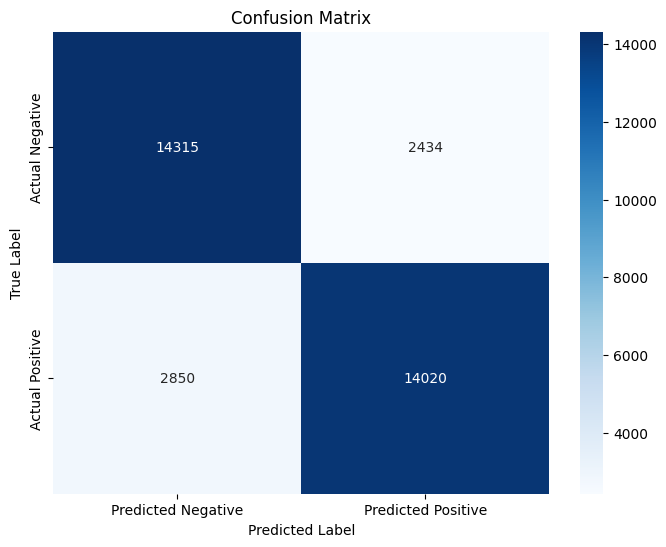

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
sk_report = classification_report(y_test, y_pred)
print('sklearn Classification Report:')
print(sk_report)
print("-"*50)

sklearn Classification Report:
              precision    recall  f1-score   support

          no       0.83      0.85      0.84     16749
         yes       0.85      0.83      0.84     16870

    accuracy                           0.84     33619
   macro avg       0.84      0.84      0.84     33619
weighted avg       0.84      0.84      0.84     33619

--------------------------------------------------


/var/folders/t2/h2z5ctrx4hs8gzpcrkkln7nc0000gn/T/ipykernel_14987/2089746362.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


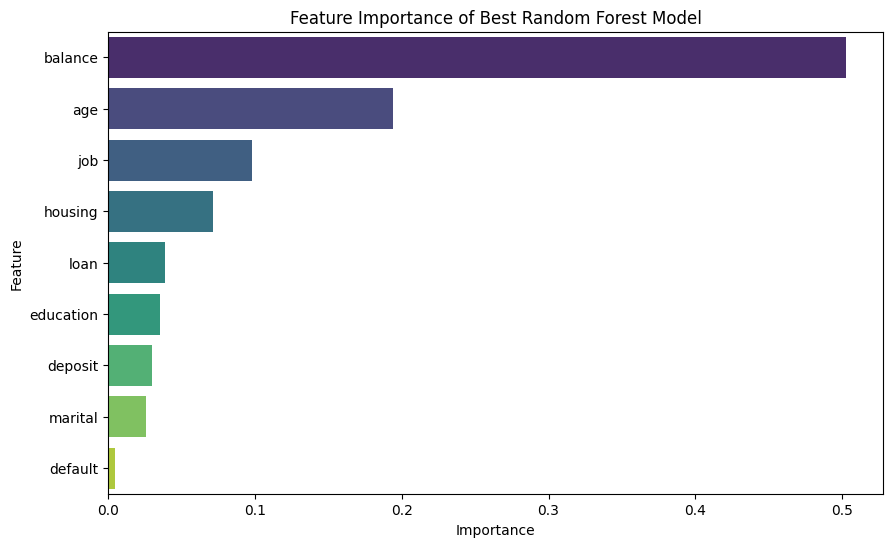

In [ ]:
# Feature Importance GridSearchCV
best_rf = grid.best_estimator_

feature_importances = best_rf.feature_importances_

features = X_train.columns  
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# sorted
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance of Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

balance: 0.5029
age: 0.1939
job: 0.0981
housing: 0.0711
loan: 0.0389
education: 0.0353
deposit: 0.0298
marital: 0.0255
default: 0.0046


In [ ]:
test

### Inference

In [ ]:
#step 1: save your model
import pickle

filename = './datasets/group4V2.model'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
#step 2: load your model
filename = './app/model/group4V2.model'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'deposit'],
      dtype='object')

In [ ]:
#step 3: predict
sample = X[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'deposit']].loc[2700]
sample

age           26.0
job            4.0
marital        2.0
education      2.0
default        0.0
balance      362.0
housing        0.0
loan           0.0
deposit        1.0
Name: 2700, dtype: float64

In [ ]:
# sample2 = [39, 4.0, 0, 2.0, 0.0, 500, 1.0,1.0, 1.0]

In [ ]:
# sample_np = np.array([sample])

In [ ]:
sample2_scaled_balance = scaler.transform([[sample[5]]])[0][0]

# Replace the original balance in sample2 with the scaled balance
sample[5] = sample2_scaled_balance

/Users/gg/Desktop/Coding/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
sample

age          26.000000
job           4.000000
marital       2.000000
education     2.000000
default       0.000000
balance       0.032734
housing       0.000000
loan          0.000000
deposit       1.000000
Name: 2700, dtype: float64

In [ ]:
sample2 = np.array([sample])

In [ ]:
sample2

array([[26.        ,  4.        ,  2.        ,  2.        ,  0.        ,
         0.03273409,  0.        ,  0.        ,  1.        ]])

In [ ]:
answer = loaded_model.predict(sample2)

/Users/gg/Desktop/Coding/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
answer

array(['yes'], dtype=object)

In [ ]:
y = dffinal[ ['y']].loc[2700]

In [ ]:
y

y    yes
Name: 2700, dtype: object

In [ ]:
checkPercent = loaded_model.predict_proba(sample2)

/Users/gg/Desktop/Coding/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
churn_probabilities = checkPercent[:, 1]
for i, churn_probability in enumerate(churn_probabilities):
    print(f"{churn_probability * 100:.2f}% will be Churn Customer")

69.16% will be Churn Customer
